# PCA分析
Hello！大家好，我是林更新。今天为大家带来PCA分析。
本次demo的数据包含了4个时间点(T2-T5)的实验组和对照组。
由于涉及的样本较多，在进行差异表达分析之前，我们先看看这些样本之间的variation。

In [16]:
# Load data
cd <- read.table("data.txt",header = TRUE, row.names = 1)
sample <- c("T2_A_1","T2_A_2","T2_A_3","T2_R_1","T2_R_2","T2_R_3",
            "T3_A_1","T3_A_2","T3_A_3","T3_R_1","T3_R_2","T3_R_3",
            "T4_A_1","T4_A_2","T4_A_3","T4_R_1","T4_R_2","T4_R_3",
            "T5_A_1","T5_A_2","T5_A_3","T5_R_1","T5_R_2","T5_R_3")
time <- c(rep("T2",6),rep("T3",6),rep("T4",6),rep("T5",6))
type <- c(rep("Treated_T2_A",3),rep("Treated_T2_R",3),rep("Treated_T3_A",3),
          rep("Treated_T3_R",3),rep("Treated_T4_A",3),rep("Treated_T4_R",3),
          rep("Treated_T5_A",3),rep("Treated_T5_R",3))
colData<-data.frame(sample,time,type)
rownames(colData)<-colnames(cd)

In [18]:
library(DESeq2)
dds <- DESeqDataSetFromMatrix(cd,colData = colData, design = ~type)
dds <- dds[rowSums(counts(dds))>1,]

# 对数据进行Normalization
rld <- rlogTransformation(dds,fitType = "local")
rld_data <- as.data.frame(assay(rld))

# pca分析
pca <- prcomp(t(rld_data))

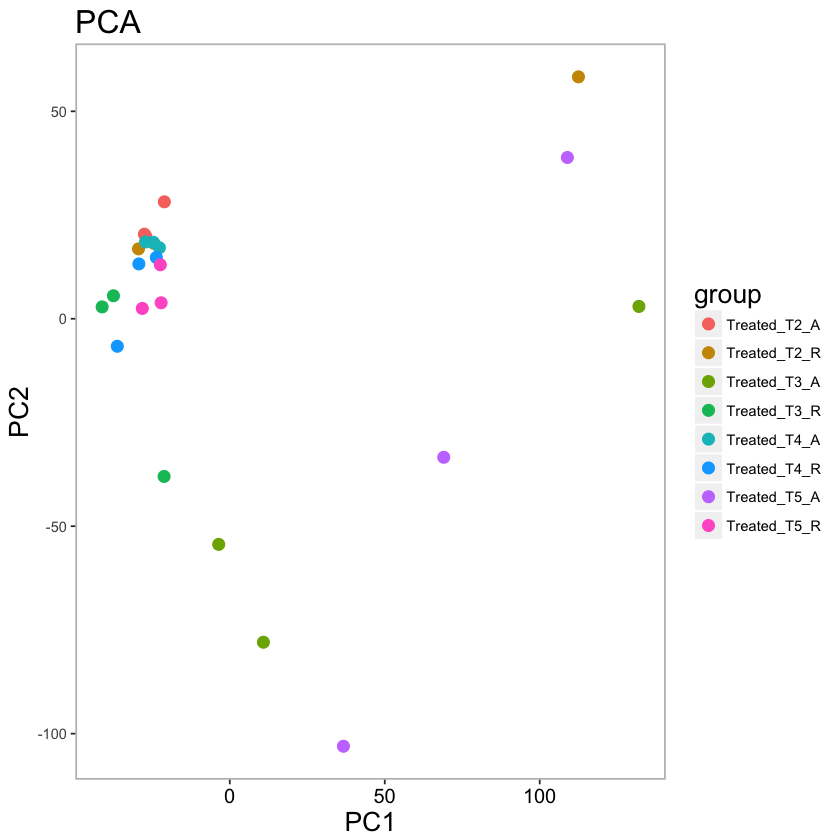

In [21]:
# visualize in 2D 
pca_dat <- as.data.frame(pca$x[,1:2])
group <- as.factor(type)

# pca plot
library(ggplot2)
p<-ggplot(pca_dat,aes(PC1,PC2,color=group)) +
  geom_point(size=3) +
  theme(panel.border = element_rect(linetype = "solid", colour = "grey",fill = NA,size = 1)) +
  theme(panel.background = element_rect(fill = "white")) +
  labs( title = "PCA ") +
  theme(title = element_text(size = 16), axis.text.x = element_text(size = 12,  color = "black")) 
p

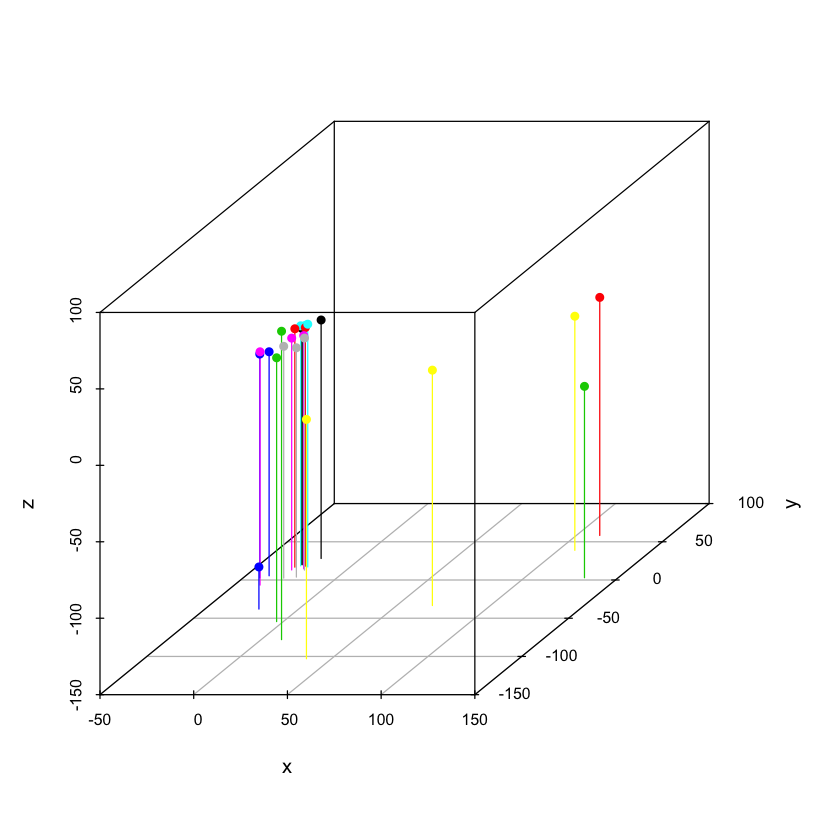

In [27]:
# Visualize in 3d
# 2d的图并不能完全展示样本在空间上的距离，所以画个3d的图装个b吧~~
library(scatterplot3d)
x <- pca$x[,1]
y <- pca$x[,2]
z <- pca$x[,3]
dat3d <- data.frame(x, y, z, group)
plot3d <- with(dat3d, scatterplot3d(x, y, z, color = as.numeric(group), pch = 16,label.tick.marks =TRUE, type = 'h', angle = 45))
legend(plot3d$xyz.convert(0.5,0.7,0.5),pch=16,xjust=-1,yjust=-1.5,legend=levels(dat3d$group), col = seq_along(levels(dat3d$group)))
text(plot3d$xyz.convert(0.5,0.7,0.5),labels = rownames(pca))

我们可以看到，有些样本生物学重复差异较大，需要舍去部分数据再进行后续分析。